<a href="https://colab.research.google.com/github/tmshariful/Heart_Dissease_analysis_and_prediction/blob/master/heart_disease_prediction_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from keras.layers import Dense
from google.colab import drive
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import classification_report, accuracy_score




np.random.seed(10)

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/News/heart_cleveland_upload.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(297, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
# statistical measures about the data
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [ ]:
heart_data.duplicated().sum()

0

In [ ]:
heart_data.drop_duplicates(inplace=True)

In [ ]:
heart_data.duplicated().sum()

0

In [ ]:
heart_data.rename(columns={'condition':'output'}, inplace = True)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,output
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


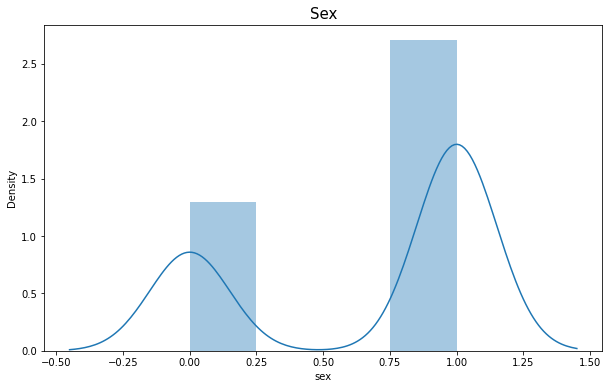

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(heart_data["sex"])
plt.title("Sex", size=15)
plt.show()

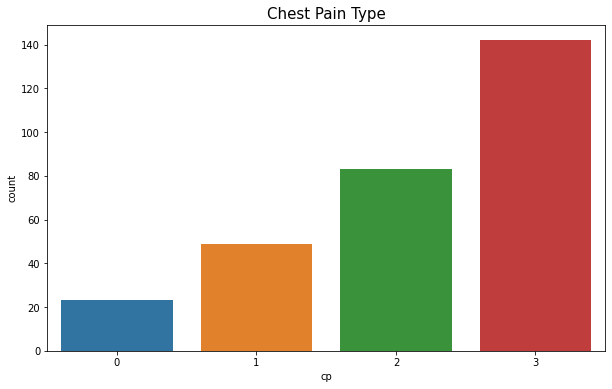

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(heart_data["cp"])
plt.title("Chest Pain Type", size=15)
plt.show()

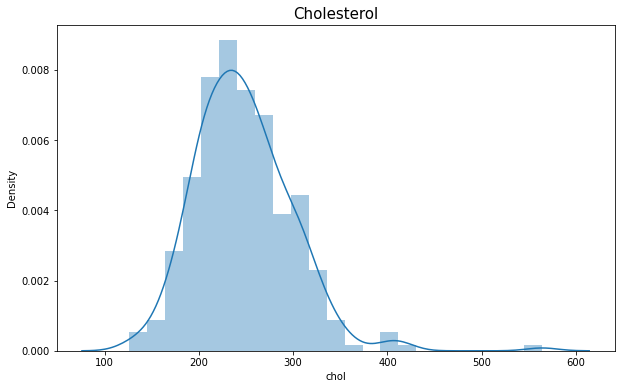

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(heart_data["chol"])
plt.title("Cholesterol", size=15)
plt.show()

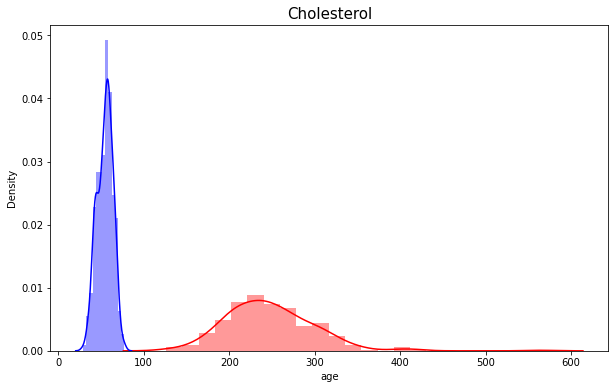

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(heart_data["chol"], color="red")
sns.distplot(heart_data["age"], color="blue")
plt.title("Cholesterol", size=15)
plt.show()

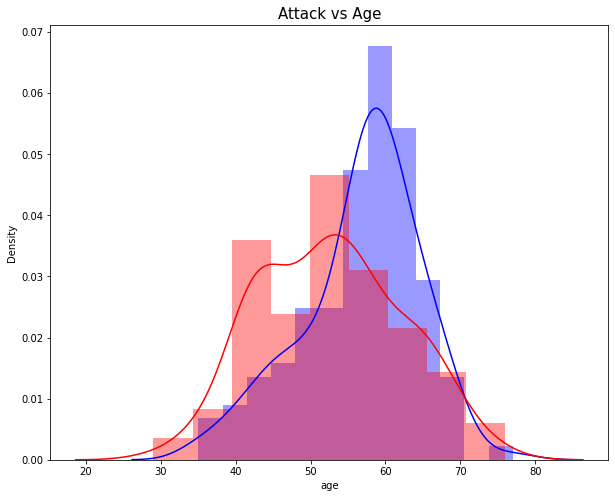

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(heart_data[heart_data["output"]==1]["age"], color="blue",label="men")
sns.distplot(heart_data[heart_data["output"]==0]["age"], color="red",label="women")
plt.title("Attack vs Age", size=15)
plt.show()

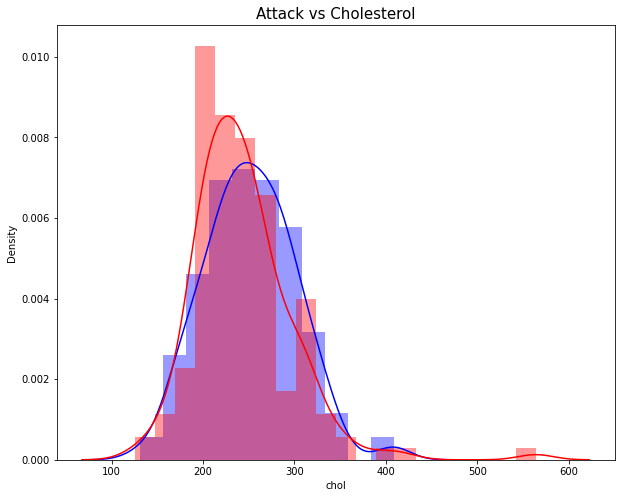

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(heart_data[heart_data["output"]==1]["chol"], color="blue")
sns.distplot(heart_data[heart_data["output"]==0]["chol"], color="red")
plt.title("Attack vs Cholesterol", size=15)
plt.show()

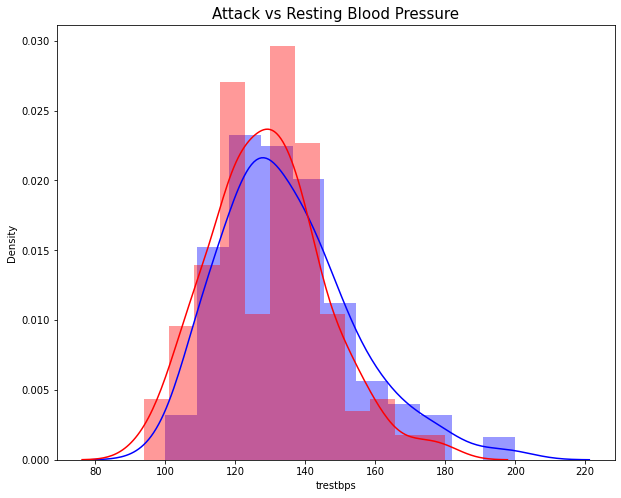

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(heart_data[heart_data["output"]==1]["trestbps"], color="blue")
sns.distplot(heart_data[heart_data["output"]==0]["trestbps"], color="red")
plt.title("Attack vs Resting Blood Pressure", size=15)
plt.show()

In [ ]:
# check for how many womens are prone to heart-attack
women_stroke = heart_data.loc[heart_data.sex == 0]['output']
women_stroke_percentage = sum(women_stroke)/len(women_stroke)
print('The % of womens prone to heart-attack: {}%'.format(women_stroke_percentage*100))

The % of womens prone to heart-attack: 26.041666666666668%


In [ ]:
women = heart_data[heart_data['sex']==0]
men = heart_data[heart_data['sex']==1]

In [ ]:
def cp_density(women, men):
    plt.figure(figsize=(10,8))
    sns.kdeplot(women['cp'], label = 'Women cp values', shade = True, color='red')
    sns.kdeplot(men['cp'], label = 'men cp values', shade = True, color = 'blue')
    plt.legend()
    plt.title('Cp values comparision', weight='bold')
    plt.xlabel('Cp values')
    
def resting_blood_pressure_comparision(women, men):
    plt.figure(figsize=(12,6))
    sns.kdeplot(women['trestbps'], label = 'Women rbp values', shade = True, color='red')
    sns.kdeplot(men['trestbps'], label = 'men rbp values', shade = True, color = 'blue')
    plt.title('Resting blood pressure values comparision', weight='bold')
    plt.legend()
    plt.xlabel('trtbps values')
    
def cholestarol(women, men):
    plt.figure(figsize=(10,6))
    sns.kdeplot(women['chol'], label = 'Women cholestoral values', shade = True, color='green')
    sns.kdeplot(men['chol'], label = 'men cholestoral values', shade = True, color = 'black')
    plt.title('Cholestarol values comparision', weight='bold')
    plt.legend()
    plt.xlabel('Cholestral values')
    
def resting_electrocardiographic(women, men):
    plt.figure(figsize=(12,6))
    sns.kdeplot(women['restecg'], label = 'Women resting electrocardiographic values', shade = True, color='green')
    sns.kdeplot(men['restecg'], label = 'men resting electrocardiographic values', shade = True, color = 'black')
    plt.title('resting electrocardiographic values comparision', weight='bold')
    plt.legend()
    plt.xlabel('resting electrocardiographic values')

def maximum_heartrate_achieved(women, men):
    plt.figure(figsize=(12,6))
    sns.kdeplot(women['thalach'], label = 'Women cp values', shade = True, color='black')
    sns.kdeplot(men['thalach'], label = 'men cp values', shade = True, color = 'yellow')
    plt.title('Maximum heart-rate achieved values comparision', weight='bold')
    plt.legend()
    plt.xlabel('Maximum heart-rate achieved values')

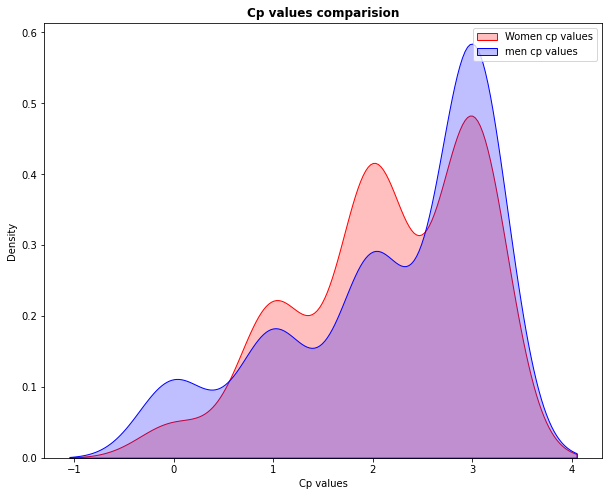

In [ ]:
cp_density(women, men)

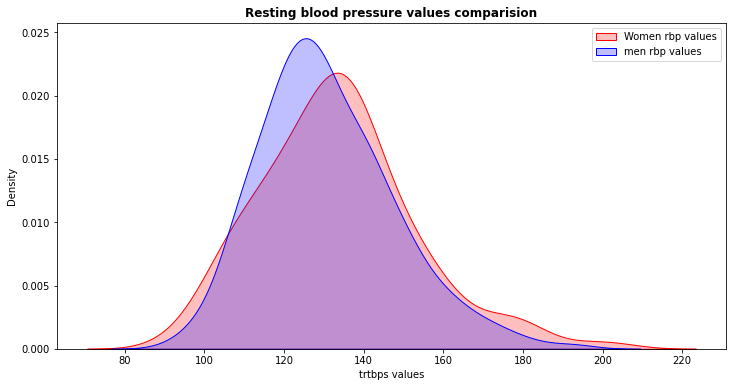

In [ ]:
resting_blood_pressure_comparision(women, men)

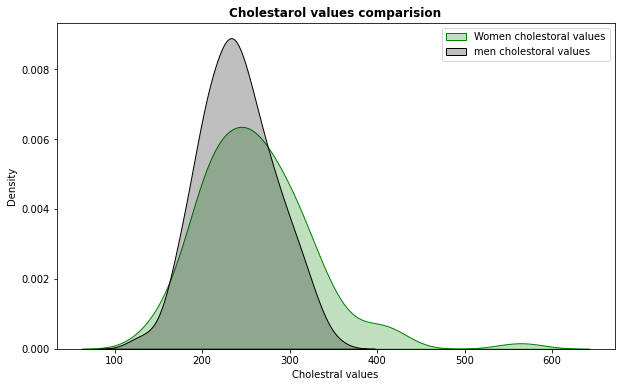

In [ ]:
cholestarol(women, men)

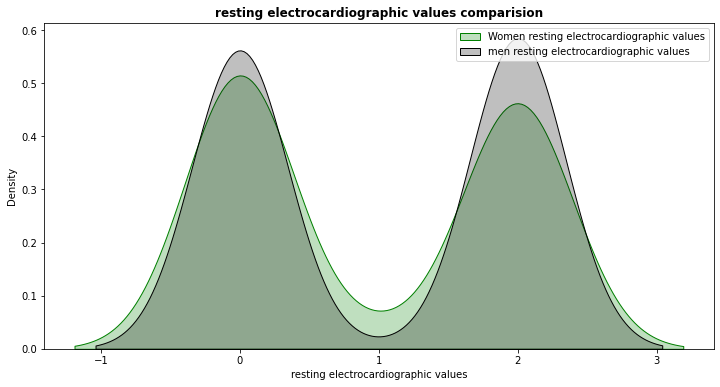

In [ ]:
resting_electrocardiographic(women, men)

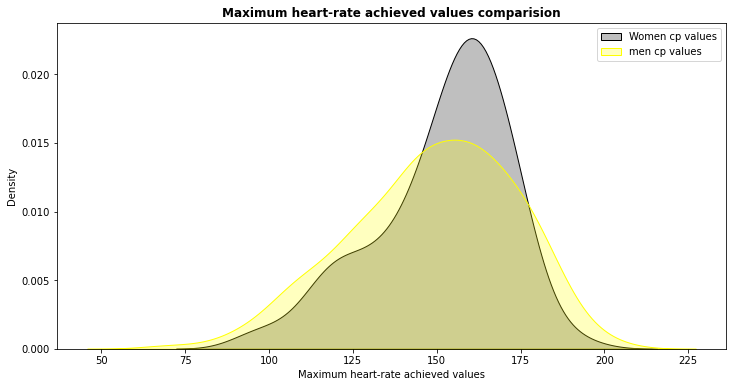

In [ ]:
maximum_heartrate_achieved(women, men)

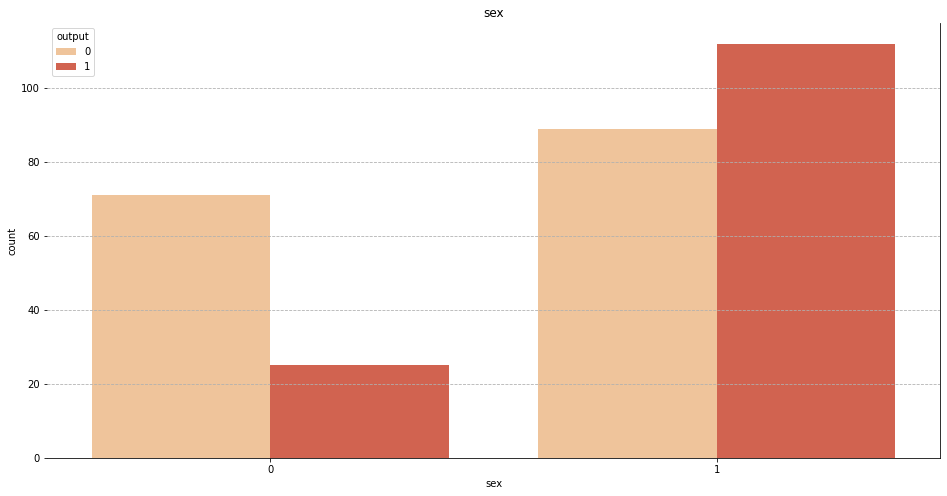

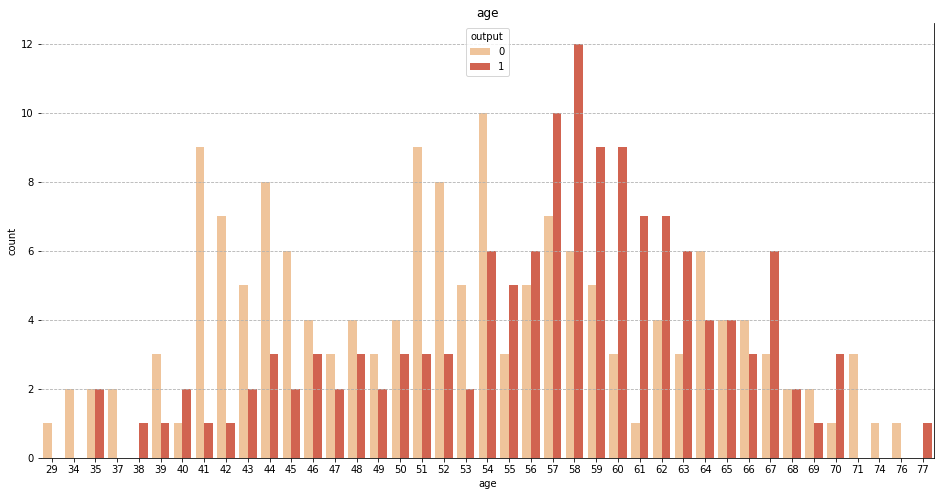

In [ ]:
# check for the age and sex
def check_the_risk(data):
    for var in ['sex','age']:
        plt.figure(figsize=(16,8))
        g = sns.countplot(data=data, x = data[var], hue = data.output, palette='OrRd')
        plt.grid(linestyle = '--', axis='y')
        plt.title(var)
        
        for i in ['top','left']:
            g.spines[i].set_visible(False)
            
check_the_risk(heart_data)

------------------------------------------------------------------------------------------------------------------------------------------------------
output      1.000000
thal        0.520516
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: output, dtype: float64


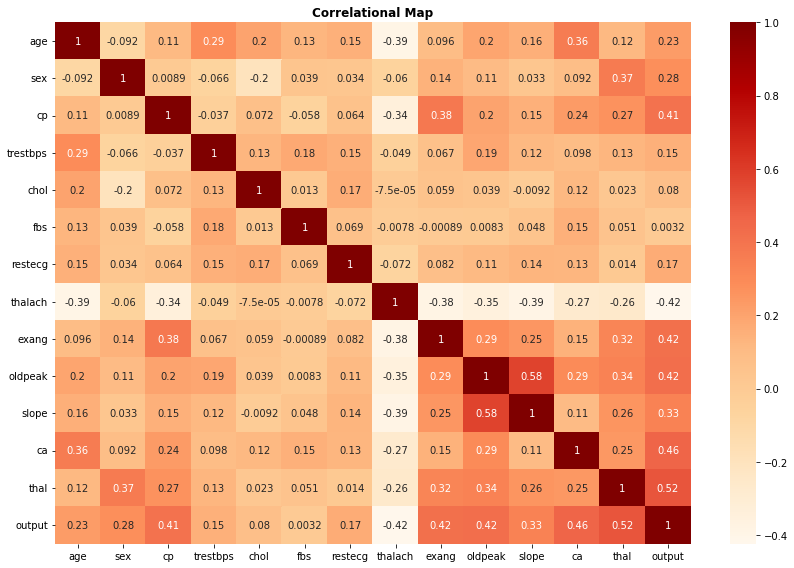

In [ ]:
def find_correlational_map(data):
    plt.figure(figsize=(12,8))
    sns.heatmap(data.corr(), annot=True, cmap='OrRd')
    plt.title('Correlational Map', weight='bold')
    print('---'*50)
    print(data.corr().output.sort_values(ascending = False))
    plt.tight_layout()
    
    
find_correlational_map(heart_data)


In [ ]:
# checking the distribution of Target Variable
heart_data['output'].value_counts()

0    160
1    137
Name: output, dtype: int64

In [ ]:
# At this moment we have a dataframe that contains all of the heart.csv data. However we need to
# Separate them to [X, Y]. Where our target labels are 'Y', and 'X' is our training data.
Y = heart_data.output.values
X = heart_data.drop(['output'], axis=1)

# Now split to train/test with 80% training data, and 20% test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (237, 13)
Test Features Size: (60, 13)
Train Labels Size: (237,)
Test Labels Size: (60,)


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

In [ ]:
def get_dataset():
    X_test,Y_test=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=1)
    return X_test,Y_test

In [ ]:
def get_voting():
    models=list()
  
    models.append(('knn', KNeighborsClassifier(n_neighbors=7)))
    models.append(('Rf', RandomForestClassifier(max_depth=9)))
    models.append(('Lr', LogisticRegression(n_jobs=11)))
    models.append(('xg', XGBClassifier(max_depth=13) ))
  
    ensemble=VotingClassifier(estimators=models,voting='hard')
    ensemble.fit(X_train,Y_train)
    return ensemble

In [ ]:
def get_models():
    models=dict()
    
    models['knn']=KNeighborsClassifier(n_neighbors=7)
    models['Rf']= RandomForestClassifier(max_depth=9)
    models['Lr']=LogisticRegression(n_jobs=11)
    models['xg']=XGBClassifier(max_depth=13)
  
    models['hard_voting']=get_voting()
    return models

In [ ]:
def evaluate_model(model,X_test,Y_test):
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    scores=cross_val_score(model,X_test,Y_test,scoring='accuracy',cv=cv,n_jobs=1,error_score='raise')
    return scores

>knn 0.927 (0.025)
>Rf 0.917 (0.031)
>Lr 0.866 (0.029)
>xg 0.924 (0.028)
>hard_voting 0.931 (0.026)


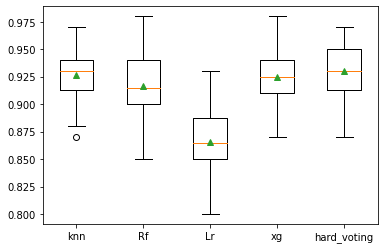

In [ ]:
X_test,Y_test=get_dataset()
models=get_models()
results,names=list(),list()
for name,model in models.items():
    scores=evaluate_model(model,X_test,Y_test)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name,mean(scores), std(scores)))
pyplot.boxplot(results,labels=names,showmeans=True)

pyplot.show()